In [1]:
import sys; sys.path.insert(0,'../../yapmap')
import sys; sys.path.insert(0,'..')
from lltk import *
from lltk.model.networks import draw_nx
gdb=GDB()

In [2]:
C1=Corpus('markmark')
C2=Corpus('chicago')
C3=Corpus('gildedage')
texts = [
    t for t in list(C1)+list(C2)+list(C3)
    if 'James' in str(t['author']) and 'Henry' in str(t['author'])
]
texts

no texts initialized. corpus in db? syncing...


[MarkMark] Init texts from db:   0%|          | 0/355 [00:00<?, ?it/s]

[MarkMark] Init texts from db:   0%|          | 0/355 [00:00<?, ?it/s]

[MarkMark] Iterating texts:   0%|          | 0/355 [00:00<?, ?it/s]

no texts initialized. corpus in db? syncing...


[Chicago] Init texts from db:   0%|          | 0/9089 [00:00<?, ?it/s]

[Chicago] Init texts from db:   0%|          | 0/9089 [00:00<?, ?it/s]

[Chicago] Iterating texts:   0%|          | 0/9089 [00:00<?, ?it/s]

no texts initialized. corpus in db? syncing...


[GildedAge] Init texts from db:   0%|          | 0/334 [00:00<?, ?it/s]

[GildedAge] Init texts from db:   0%|          | 0/334 [00:00<?, ?it/s]

[GildedAge] Iterating texts:   0%|          | 0/334 [00:00<?, ?it/s]

[TextMarkMark(_markmark/James,_Henry.The_Ambassadors),
 TextMarkMark(_markmark/James,_Henry.The_Bostonians),
 TextMarkMark(_markmark/James,_Henry.The_Golden_Bowl),
 TextMarkMark(_markmark/James,_Henry.The_Portrait_of_a_Lady),
 TextMarkMark(_markmark/James,_Henry.The_Wings_of_the_Dove),
 TextChicago(_chicago/00000037),
 TextChicago(_chicago/00000038),
 TextChicago(_chicago/00000039),
 TextChicago(_chicago/00000086),
 TextChicago(_chicago/00000130),
 TextChicago(_chicago/00000381),
 TextChicago(_chicago/00000524),
 TextChicago(_chicago/00000711),
 TextChicago(_chicago/00000901),
 TextChicago(_chicago/00000902),
 TextChicago(_chicago/00001312),
 TextChicago(_chicago/00001457),
 TextChicago(_chicago/00001601),
 TextChicago(_chicago/00001757),
 TextChicago(_chicago/00002099),
 TextChicago(_chicago/00002238),
 TextChicago(_chicago/00002499),
 TextChicago(_chicago/00003255),
 TextChicago(_chicago/00003858),
 TextChicago(_chicago/00003859),
 TextChicago(_chicago/00004205)]

In [3]:
with log:
    for t in get_tqdm(texts):
        t.init(remote=True)

  0%|          | 0/26 [00:00<?, ?it/s]

[19:43:23] lltk.text.text.init( Init metadata: TextMarkMark(_markmark/James,_Henry.The_Ambassadors), kwargs = {} )
[19:43:23] lltk.text.text.get_remote_sources( TextMarkMark(_markmark/James,_Henry.The_Ambassadors) )
[19:43:23] lltk.corpus.corpus.Corpus( <- id = hathi )
[19:43:23] lltk.corpus.utils.load_corpus( <- id = hathi )
[19:43:23] lltk.corpus.utils.load_corpus( Importing corpus class "Hathi" from /Users/ryan/github/lltk/lltk/corpus/hathi/hathi.py )
[19:43:23] lltk.corpus.corpus.__init__( Hathi(hathi) )
[19:43:23] lltk.corpus.utils.load_corpus( -> HathiCorpus(hathi) )
[19:43:23] lltk.corpus.corpus.Corpus( -> HathiCorpus(hathi) )
[19:43:23] lltk.text.text.get_remote_sources( remote corpus: HathiCorpus(hathi) (TextMarkMark(_markmark/James,_Henry.The_Ambassadors)) )
[19:43:23] lltk.text.text.get_sources( ... )
[19:43:23] lltk.text.text.get_matches( ... )
[19:43:23] hathi.query_for_ids( <- TextMarkMark(_markmark/James,_Henry.The_Ambassadors) )
[19:43:23] hathi.query_for_ids( <- https:

In [ ]:
tx=random.choice(texts)
tx.title

'The Ambassadors'

In [ ]:
pladys = [t for t in texts if 'portrait of a lady' in t.title.lower()]
t = pladys[0]
t

TextMarkMark(_markmark/James,_Henry.The_Portrait_of_a_Lady)

In [ ]:
def to_nx2(self,texts,rel=None,min_overlap=3,**kwargs):
    g=nx.Graph()
    all_texts = {t for t in texts} | {src for t in texts for src in t.sources}
    if log: log(f'all_texts = {len(all_texts)}')
    for t1 in get_tqdm(all_texts):
        for t2 in all_texts:
            if t1.addr>=t2.addr: continue
            overlap=t1.linked() & t2.linked()
            log(f'{t1} --> {t2}, {len(overlap)} {pf(overlap)}')
            if len(overlap) >= min_overlap:
                g.add_edge(t1.addr,t2.addr)
    return g

LLDBGraph.to_nx2=to_nx2


def to_nx(self,texts,rel=None,**kwargs):
    g=nx.MultiGraph()
    for tx in get_tqdm(texts):
        for src in tx.sources:
            for u,v,d in src.gdb.get_edges(src.addr):
                relx=d.get('rel')
                if rel and relx != rel: continue
                if not g.has_node(u): g.add_node(u)#,**Text(u).meta)
                if not g.has_node(v): g.add_node(v)#,**Text(v).meta)
                if not g.has_edge(u,v,key=relx):
                    g.add_edge(u,v,key=relx,**d)
    return g

LLDBGraph.to_nx=to_nx

In [ ]:
C=Corpus('markmark')

In [ ]:
Ctexts=set(texts)
len(Ctexts), Ctexts

(26,
 {TextChicago(_chicago/00000037),
  TextChicago(_chicago/00000038),
  TextChicago(_chicago/00000039),
  TextChicago(_chicago/00000086),
  TextChicago(_chicago/00000130),
  TextChicago(_chicago/00000381),
  TextChicago(_chicago/00000524),
  TextChicago(_chicago/00000711),
  TextChicago(_chicago/00000901),
  TextChicago(_chicago/00000902),
  TextChicago(_chicago/00001312),
  TextChicago(_chicago/00001457),
  TextChicago(_chicago/00001601),
  TextChicago(_chicago/00001757),
  TextChicago(_chicago/00002099),
  TextChicago(_chicago/00002238),
  TextChicago(_chicago/00002499),
  TextChicago(_chicago/00003255),
  TextChicago(_chicago/00003858),
  TextChicago(_chicago/00003859),
  TextChicago(_chicago/00004205),
  TextMarkMark(_markmark/James,_Henry.The_Ambassadors),
  TextMarkMark(_markmark/James,_Henry.The_Bostonians),
  TextMarkMark(_markmark/James,_Henry.The_Golden_Bowl),
  TextMarkMark(_markmark/James,_Henry.The_Portrait_of_a_Lady),
  TextMarkMark(_markmark/James,_Henry.The_Wings_of_

In [ ]:
g=gdb.to_nx(Ctexts)
g

  0%|          | 0/26 [00:00<?, ?it/s]

In [ ]:
from cdlib.algorithms import louvain

coms = louvain(g, resolution=1, randomize=False)
coms

In [ ]:
len(coms.communities)

27

In [ ]:
for nset in coms.communities:
    tset=list(map(Text,nset))
    print(Counter(t.title for t in tset if t.title))
    print(tset)
    print()

Counter({'The American': 2})
[TextGildedAge(_gildedage/1877.James.Am.M.The_American), TextHathiRecord(_hathi/htrn/000008632), TextHathiRecord(_hathi/htrn/000336722), TextHathiRecord(_hathi/htrn/000442103), TextHathiRecord(_hathi/htrn/000481320), TextHathiRecord(_hathi/htrn/000481322), TextHathiRecord(_hathi/htrn/000502182), TextHathiRecord(_hathi/htrn/000775340), TextHathiRecord(_hathi/htrn/000806544), TextHathiRecord(_hathi/htrn/001020609), TextHathiRecord(_hathi/htrn/001027545), TextHathiRecord(_hathi/htrn/001055409), TextHathiRecord(_hathi/htrn/001080123), TextHathiRecord(_hathi/htrn/001141172), TextHathiRecord(_hathi/htrn/001141173), TextHathiRecord(_hathi/htrn/001141174), TextHathiRecord(_hathi/htrn/001141601), TextHathiRecord(_hathi/htrn/001156204), TextHathiRecord(_hathi/htrn/001156205), TextHathiRecord(_hathi/htrn/001262430), TextHathiRecord(_hathi/htrn/001439225), TextHathiRecord(_hathi/htrn/001441167), TextHathiRecord(_hathi/htrn/001535211), TextHathiRecord(_hathi/htrn/001748

In [ ]:
pladys

[TextMarkMark(_markmark/James,_Henry.The_Portrait_of_a_Lady)]

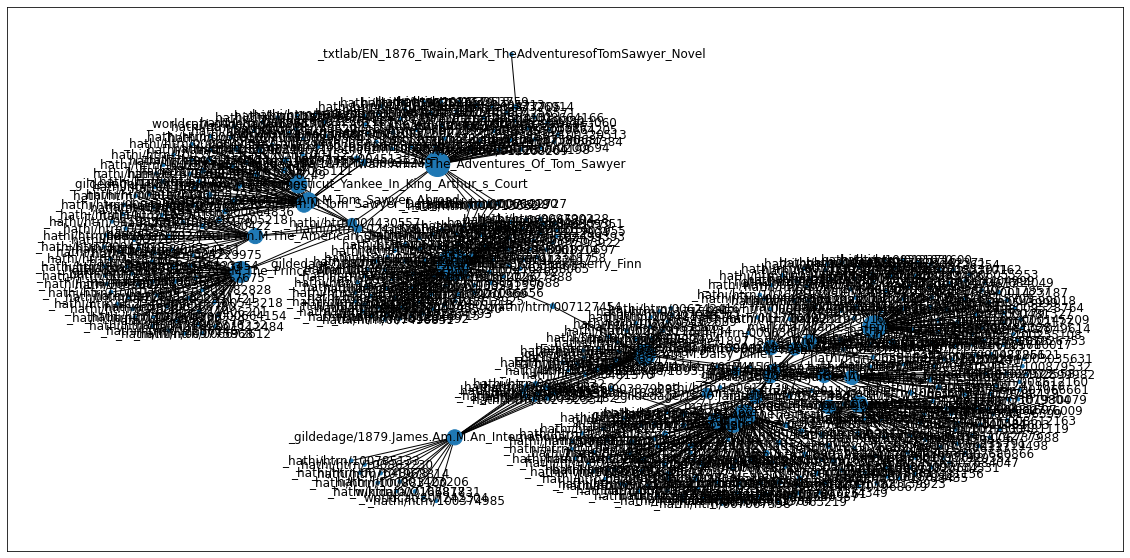

In [ ]:
draw_nx(g)

In [ ]:
for subnode in co

In [ ]:
g=gdb.to_nx(texts)

  0%|          | 0/5 [00:00<?, ?it/s]

In [ ]:
for subg in nx.connected_components(g):
    subg_tl = {tx for tx in subg if tx in set(texts)}
    gsub = g.subgraph(subg_tl).copy()
    for u,v,d in g.edges(data=True):
        if u in subg_tl or v in subg_tl:
            gsub.add_edge(u,v,**d)

    print(subg_tl, gsub.order(), gsub.size())
    break

{'_markmark/James,_Henry.The_Golden_Bowl', '_markmark/James,_Henry.The_Wings_of_the_Dove', '_markmark/James,_Henry.The_Portrait_of_a_Lady', '_markmark/James,_Henry.The_Ambassadors'} 109 111


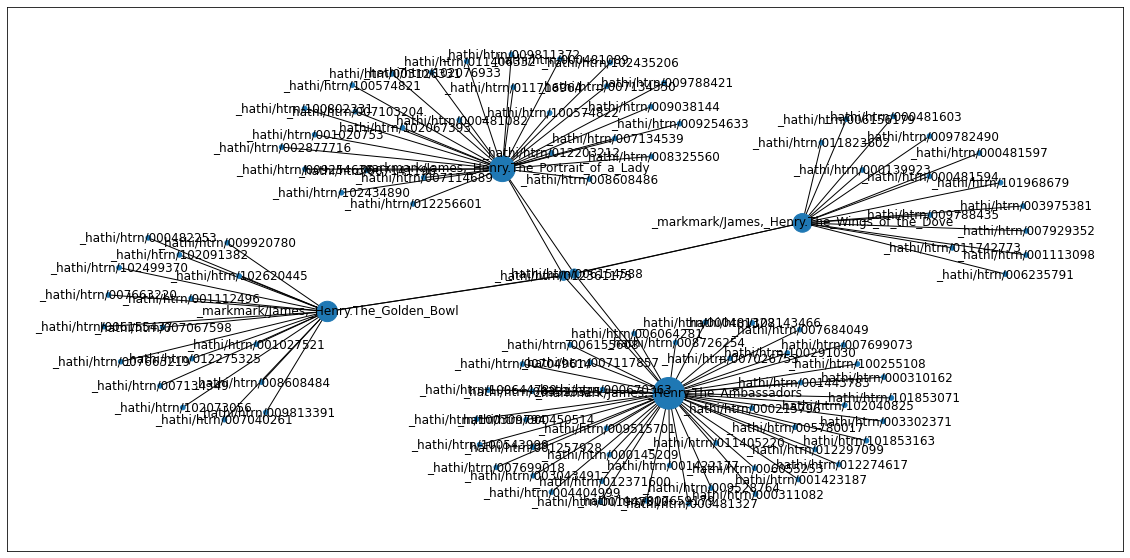

In [ ]:
draw_nx(gsub)

In [ ]:
from lltk.model.networks import netstat_nx

In [ ]:
netstat_nx(g)

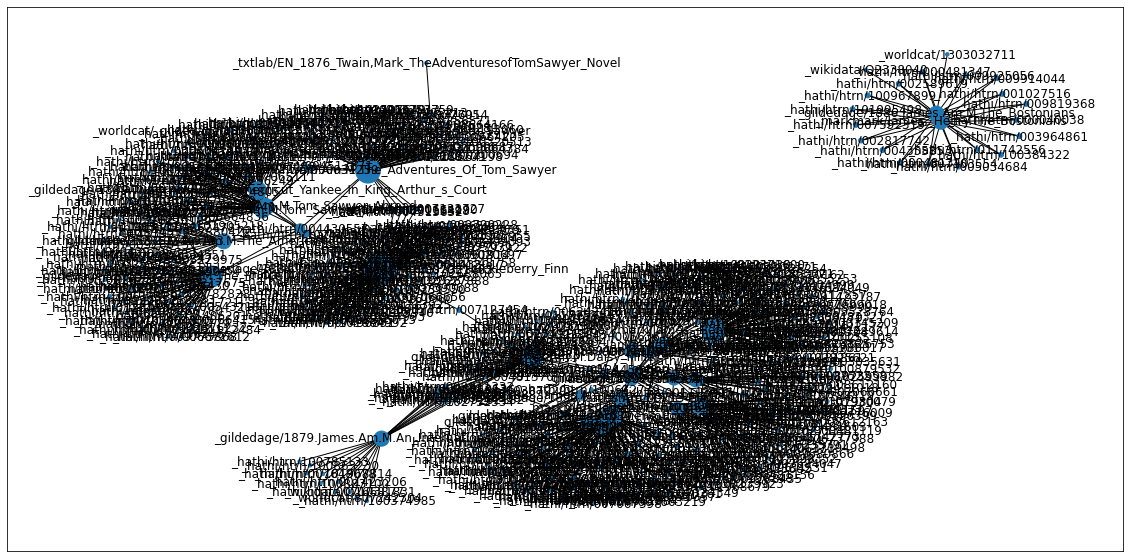

In [ ]:
draw_nx(g)

In [ ]:
dfnodes=pd.DataFrame([y for x,y in g.nodes(data=True)], index=g.nodes()).sort_values('degree_centrality',ascending=False)
dfnodes.head(10)

,degree,degree_centrality,betweenness_centrality
_gildedage/1884.Twain.Am.M.Adventures_Of_Huckleberry_Finn,83,0.152574,0.552668
_gildedage/1876.Twain.Am.M.The_Adventures_Of_Tom_Sawyer,50,0.091912,0.150933
"_markmark/James,_Henry.The_Ambassadors",46,0.084559,0.148860
_gildedage/1879.James.Am.M.Daisy_Miller,37,0.068015,0.534977
_gildedage/1882.Twain.Am.M.The_Prince_And_The_Pauper,36,0.066176,0.114974
"_markmark/James,_Henry.The_Portrait_of_a_Lady",30,0.055147,0.048065
_gildedage/1881.James.Am.M.The_Portrait_of_a_Lady,30,0.055147,0.048065
_gildedage/1889.Twain.Am.M.A_Connecticut_Yankee_In_King_Arthur_s_Court,25,0.045956,0.080477
_gildedage/1876.James.Am.M.Roderick_Hudson,24,0.044118,0.076095
_gildedage/1894.Twain.Am.M.Tom_Sawyer_Abroad,22,0.040441,0.046724


  0%|          | 0/1 [00:00<?, ?it/s]

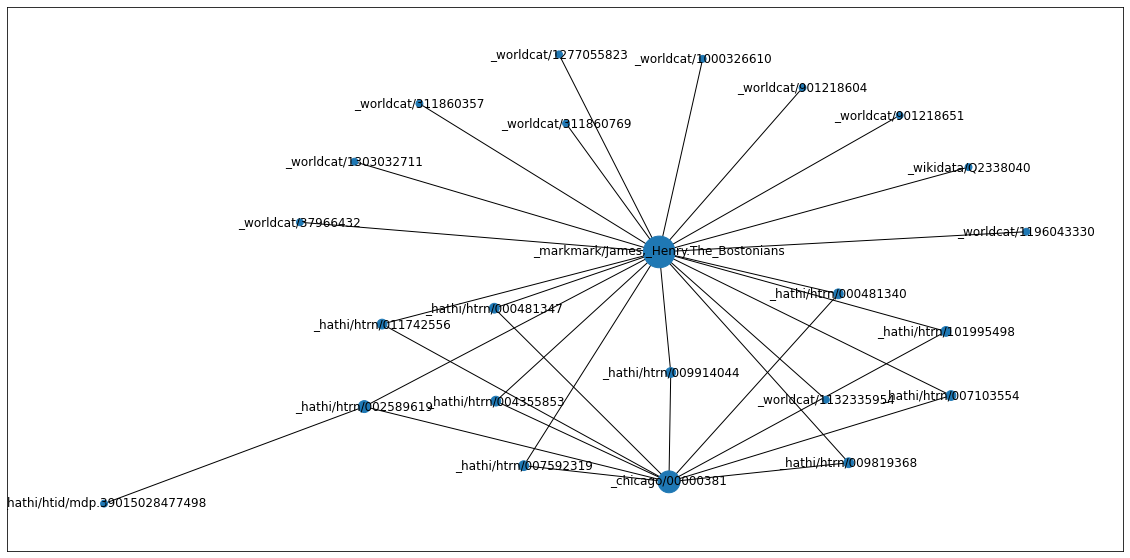

In [ ]:
draw_nx(gdb.to_nx(random.choice(texts)))

In [ ]:
g2=gdb.to_nx(*texts)
g2.order(), g2.size()

  0%|          | 0/26 [00:00<?, ?it/s]

(435, 458)

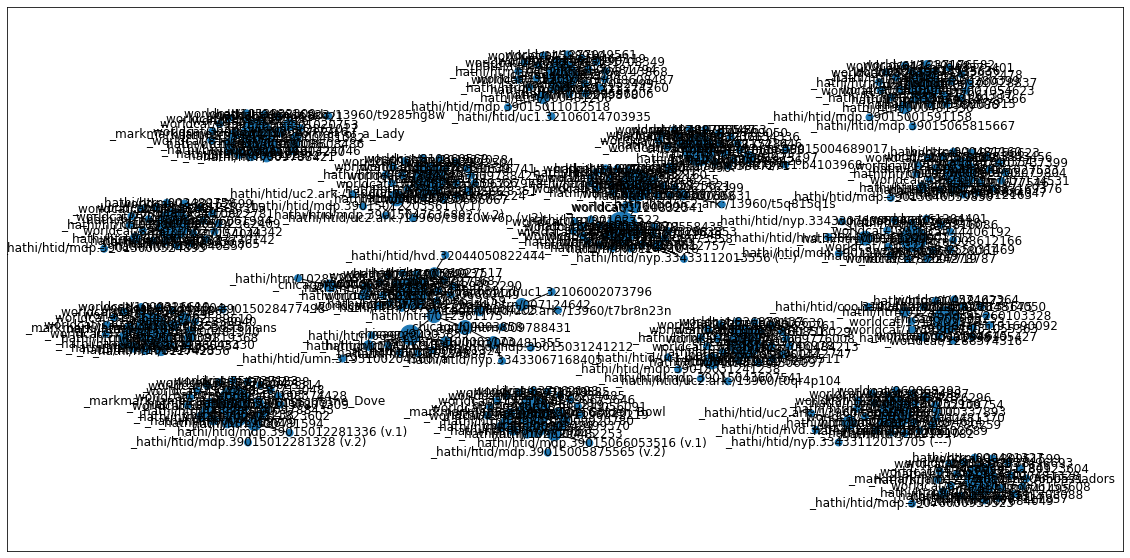

In [ ]:
draw_nx(g2)